In [1]:
import numpy as np
from matplotlib import pyplot as plt
import mltools as ml

In [2]:
from mltools.transforms import rescale

In [3]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

### 1. Show the two classes in a scatter plot (one for each data set) and verify that one data set is linearly separable while the other is not. (5 points)

Text(0, 0.5, 'feature 2')

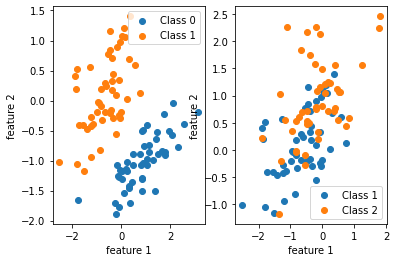

In [4]:
# Class 0 vs Class 1
fig, ax = plt.subplots(1, 2)
ax[0].scatter(XA[YA==0,0], XA[YA==0,1], label = 'Class 0')
ax[0].legend()
ax[0].scatter(XA[YA==1,0], XA[YA==1,1], label = 'Class 1')
ax[0].legend()
ax[0].set_xlabel('feature 1')
ax[0].set_ylabel('feature 2')

# Class 1 vs Class 2
ax[1].scatter(XB[YB==1,0], XB[YB==1,1], label = 'Class 1')
ax[1].legend()
ax[1].scatter(XB[YB==2,0], XB[YB==2,1], label = 'Class 2')
ax[1].legend()
ax[1].set_xlabel('feature 1')
ax[1].set_ylabel('feature 2')

Class 0 and Class 1 are linearly separable, whereas Class 1 and Class 2 are not.

### 2. Include the lines of code you added to the function, and the two generated plots.

x2b = (-self.theta[0]-self.theta[1]*x1b)/self.theta[2];      # TODO find x2 values as a function of x1's values

Text(0.5, 1.0, 'Class 0 vs Class 1')

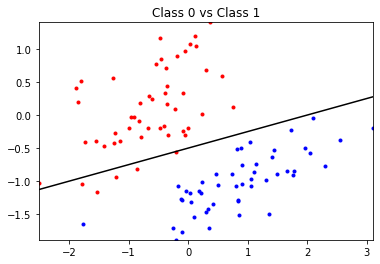

In [5]:
from logisticClassify2 import *
learner1 = logisticClassify2(); # create "blank" learner
learner1.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner1.theta = wts; # fill in the theta values
learner1.plotBoundary(XA,YA)
plt.title('Class 0 vs Class 1')

Text(0.5, 1.0, 'Class 1 vs Class 2')

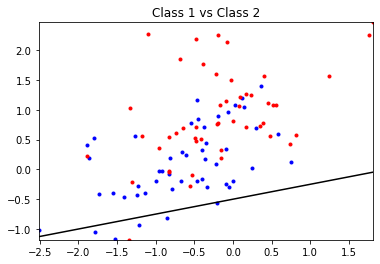

In [6]:
learner2 = logisticClassify2();
learner2.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner2.theta = wts; # set the learner's parameters
learner2.plotBoundary(XB,YB)
plt.title('Class 1 vs Class 2')

### 3.Include the function definition and the two computed errors. 

    Definition:
    
    For each point in X, computer the linear response r = 0.5 − 0.25x_1 + 1x_2 
    
    If r > 0, we know that the data point lies above the decision line. We will predict Class 1. 
    
    If r < 0, we know that the data point lies under the decision line. We will predict Class 0.

In [7]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;

ErrorA = learner.err(XA,YA)
print('Errors for set A:', ErrorA)

ErrorB = learner.err(XB,YB-1)
print('Errors for set B:', ErrorB)

Errors for set A: 0.050505050505050504
Errors for set B: 0.46464646464646464


### 4. Verify that your predict code matches your boundary plot by using plotClassify2D with your manually constructed learner on the two data sets. This will call predict on a dense grid of points, and you should find that the resulting decision boundary matches the one you computed analytically.

C:\Users\pendr\Documents\CS273\Assignment 3\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\pendr\Documents\CS273\Assignment 3\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


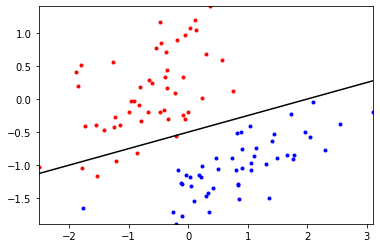

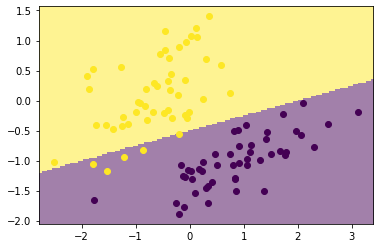

In [8]:
# Class 0 vs Class 1
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.plotBoundary(XA,YA)
plt.figure()
ml.plotClassify2D(learner, XA, YA)

C:\Users\pendr\Documents\CS273\Assignment 3\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )
C:\Users\pendr\Documents\CS273\Assignment 3\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


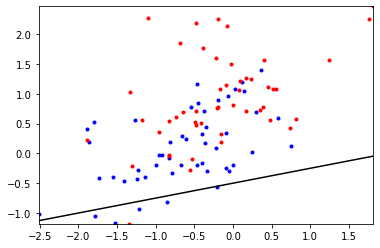

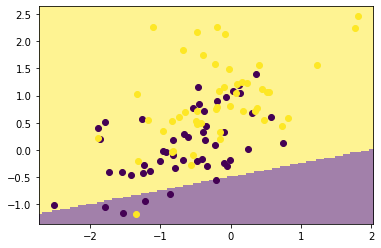

In [9]:
# Class 1 vs Class 2
learner.theta = wts;
learner.plotBoundary(XB,YB-1)
plt.figure()
ml.plotClassify2D(learner, XB, YB-1)

### 5

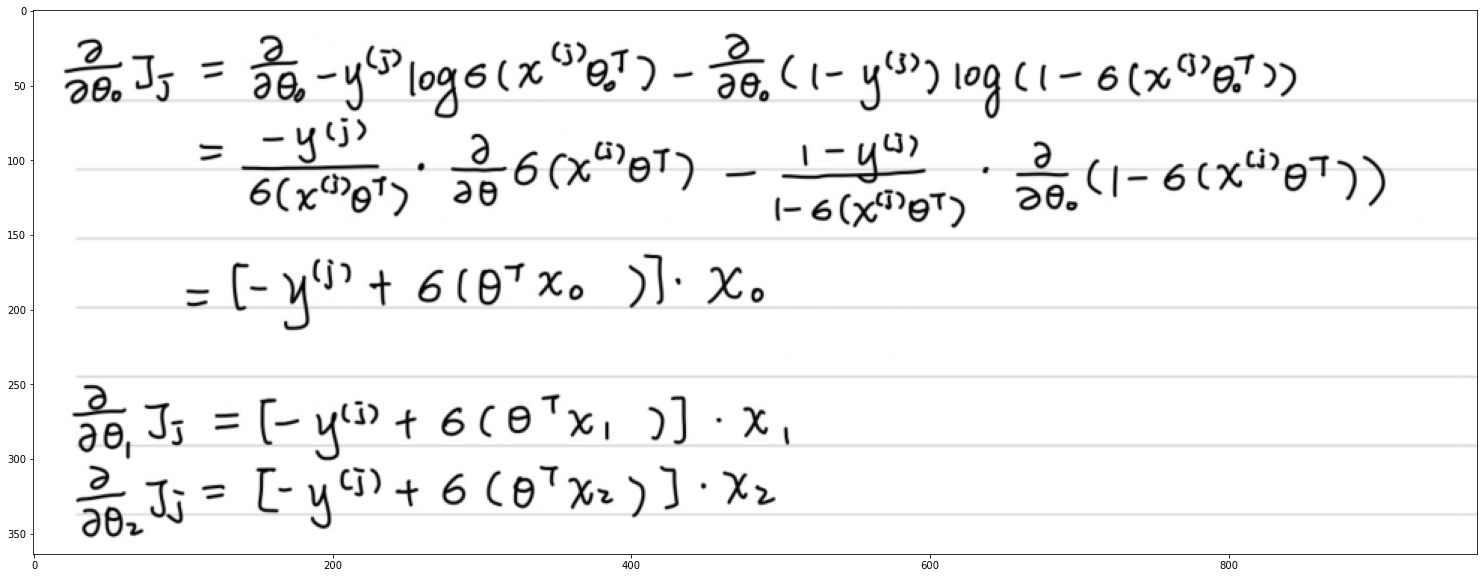

In [10]:
import matplotlib.image as mpimg
plt.figure(figsize = (40,10))
image = mpimg.imread("5.png")
plt.imshow(image)
plt.show()

### 6. Include the complete implementation of train .

In [11]:
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = self.theta@XX[i,:];     # TODO: compute linear response r(x)
                sigma_ri = 1/(1+np.exp(-ri))
                gradi = (-YY[i] + sigma_ri) * XX[i,:];     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            jsur = 0
            for i in np.random.permutation(M):
                sigma = 1/(1+np.exp(-self.theta@XX[i,:]))
                jsur += -YY[i]*np.log(sigma)-(1-YY[i])*np.log(1-sigma)
            Jsur = jsur/M

            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append( Jsur ) # TODO evaluate the current NLL loss
            #plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            #if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            #plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            if len(Jnll) == 1:
                done = epoch > stopEpochs 
            else:
              done = epoch > stopEpochs or np.abs(Jnll[-1] - Jnll[-2]) < stopTol;   # or if Jnll not changing between epochs ( < stopTol )
            plt.figure(1)
            plt.plot(Jnll,'b-',J01,'r-')
            plt.xlabel("epoch")
            plt.title("Convergence of Surrogate Loss and Error Rate")
            plt.draw(); 
                
            plt.figure(2);
            plt.title('Converged');
            self.plotBoundary(X,Y); 
            plt.draw();

### 7 Run train for your logistic regression classifier on both data sets (A and B). Describe your parameter choices for each dataset (stepsize, etc.) and include plots showing the convergence of the surrogate loss and error rate (e.g., the loss values as a function of epoch during gradient descent), and the final converged classifier with the data (the included train function does that for you already).

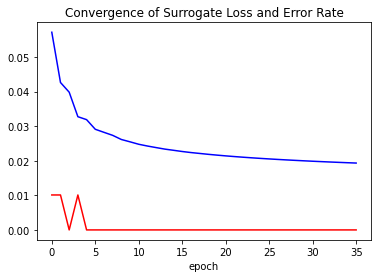

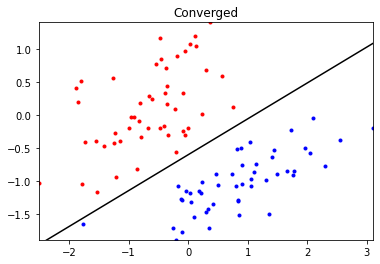

In [12]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train(XA,YA,initStep=1)

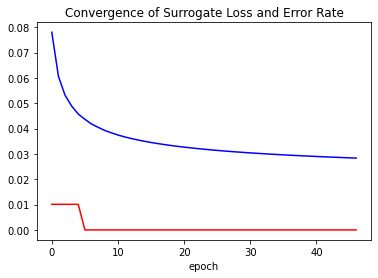

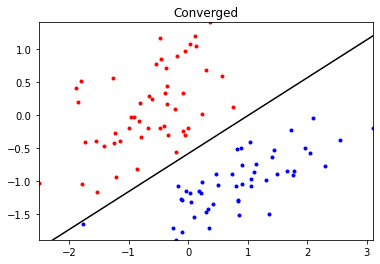

In [13]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train(XA,YA,initStep=0.5)

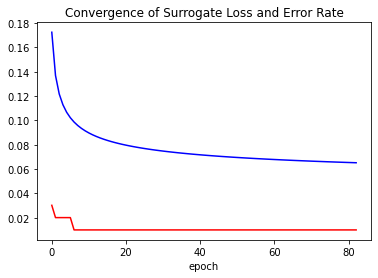

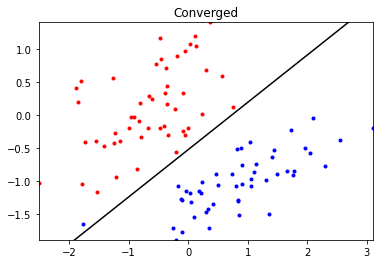

In [14]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train(XA,YA,initStep=0.1)

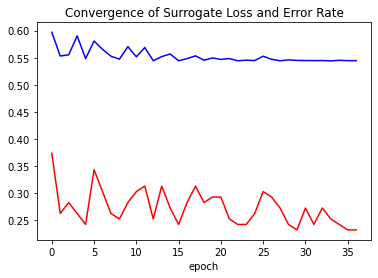

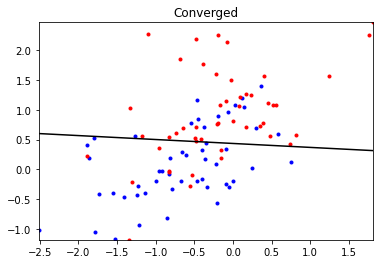

In [15]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train(XB,YB,initStep=1)

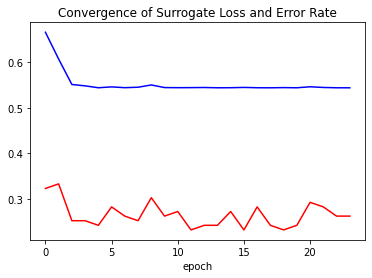

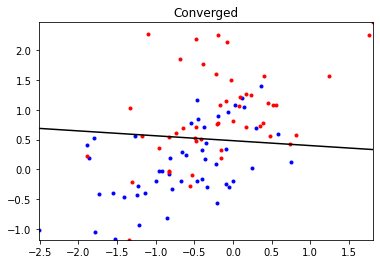

In [16]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train(XB,YB,initStep=0.5)

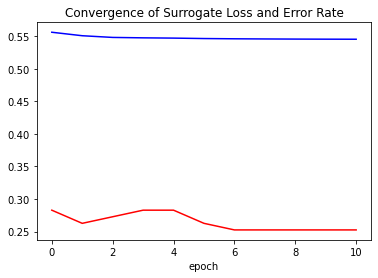

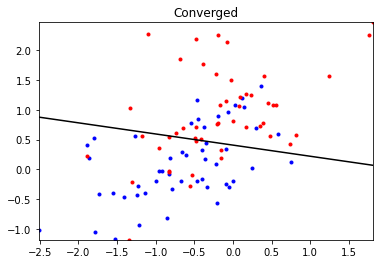

In [17]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train(XB,YB,initStep=0.1)

I chose initStep of 0.1 because it shows how surrogate loss converges and how the error rate changes. When the step size is equal to 1, the convergence curve is very steep and it is difficult to observe the training process.

### 8. Add an L1 regularization term

#### alpha = 2

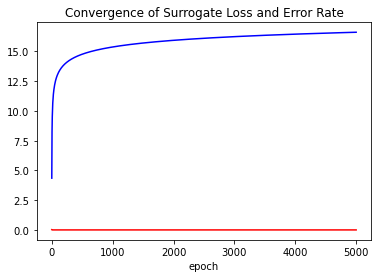

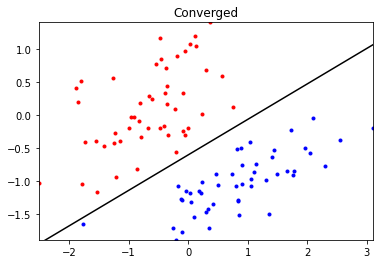

In [18]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train1(XA,YA,initStep=0.5)

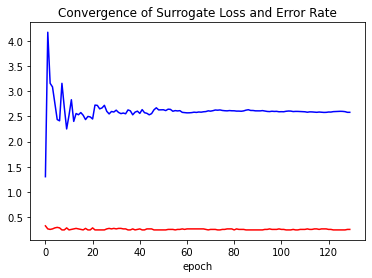

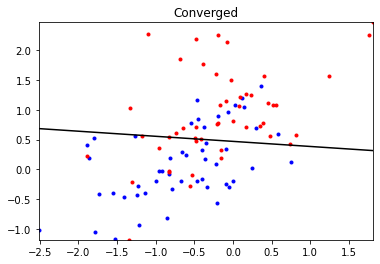

In [19]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train1(XB,YB,initStep=0.5)

#### alpha = 5

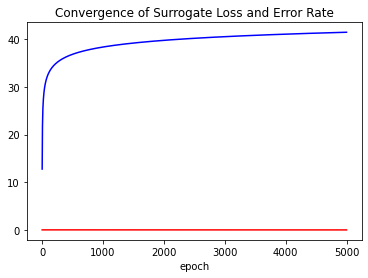

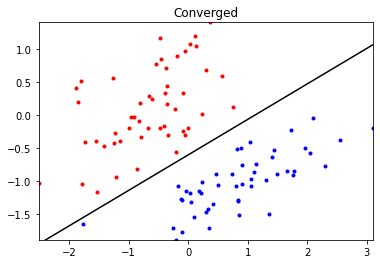

In [20]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train1(XA,YA,initStep=0.5,alpha = 5)

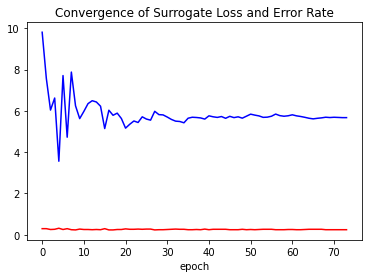

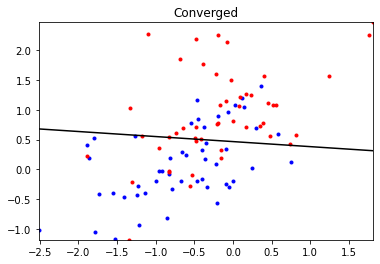

In [21]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train1(XB,YB,initStep=0.5,alpha = 5)

#### alpha = 0.01

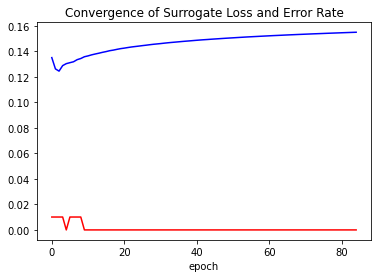

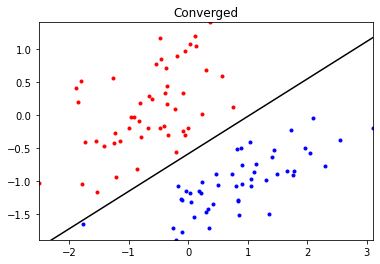

In [22]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XA,YA,initStep=0.5,alpha = 0.01)

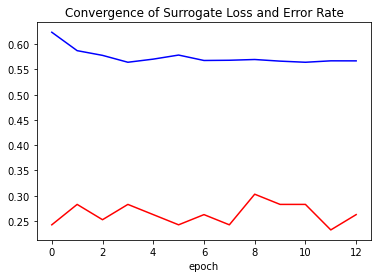

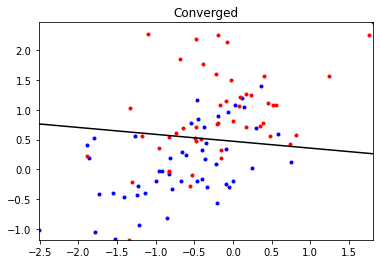

In [23]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XB,YB,initStep=0.5,alpha = 0.01)

### 9. Add an L2 regularization term

#### alpha = 2

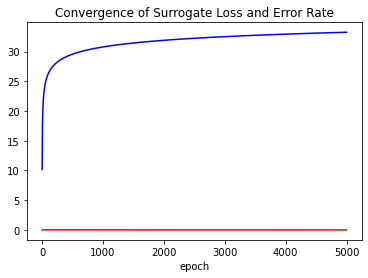

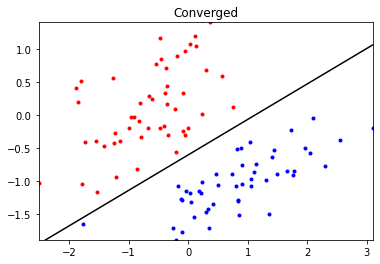

In [24]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XA,YA,initStep=0.5)

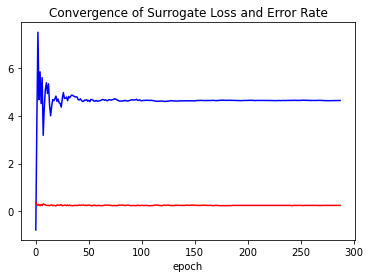

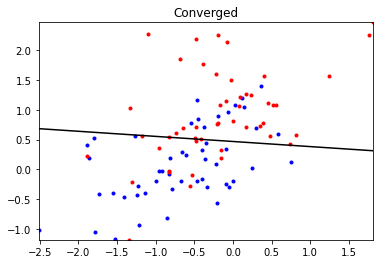

In [25]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XB,YB,initStep=0.5)

#### alpha = 5

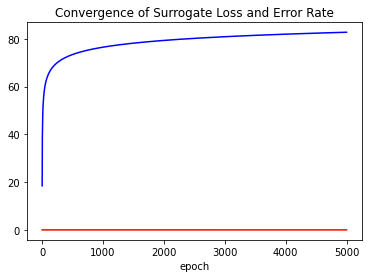

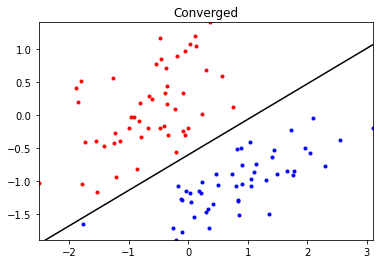

In [26]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XA,YA,initStep=0.5,alpha = 5)

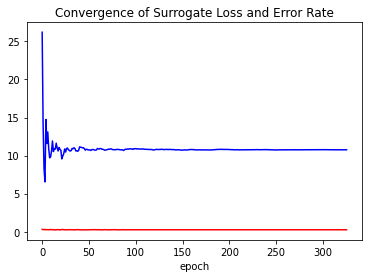

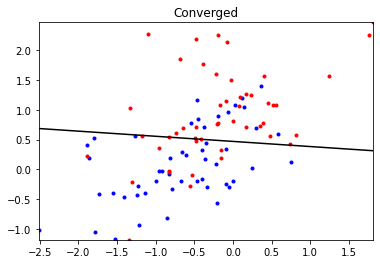

In [27]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XB,YB,initStep=0.5,alpha = 5)

#### alpha = 0.01

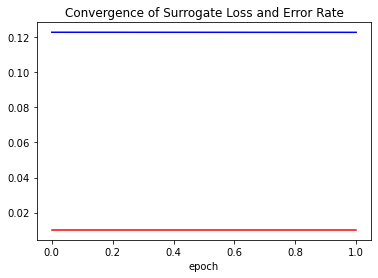

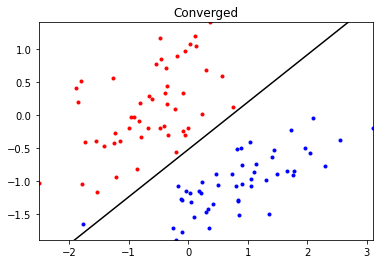

In [28]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XA,YA,initStep=0.5,alpha = 0.01)

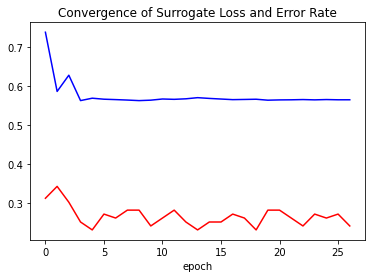

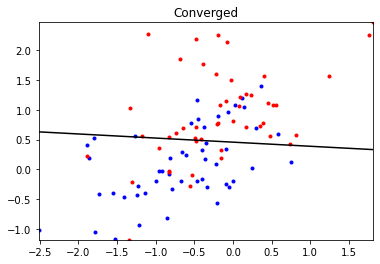

In [29]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1]); # TODO: fill in values
learner.theta = wts;
learner.train2(XB,YB,initStep=0.5,alpha = 0.01)

The L1 parametric loss function, also known as the mean absolute value error, minimizes the sum of the absolute differences between the target value and the estimated value. the L2 parametric loss function, also known as the mean squared error, minimizes the sum of the squares of the differences between the target value Yi and the estimated value f(xi). the L2 parametric loss averages the errors and the model will have a larger error than the L1 parametric, so the model will be more sensitive to the sample, which requires adjusting the model to minimize the This requires adjusting the model to minimize the error. If a sample is an outlier, the model will need to be adjusted to fit the single outlier, at the expense of many other normal samples whose errors are smaller than the single outlier's error. For this model, since we do not have that many outliners, L1 regulazation is enough.

Statement of Collaboration 

Completed individually and searched Google for more datailed explanation for Question 10